##NVLab Summer School Assignment 1
Part I.

In [29]:
# from google.colab import drive
# drive.mount('/content/drive')

In [30]:
# !ls /content/drive/
# %cd "/content/drive/My Drive"
# %cd "summer_hw1/hw1/resources"

# !ls

In [31]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
# from google.colab.patches import cv2_imshow

Sample code of some functions, you can delete this section after you are familiar with them

(176, 286, 3)
<class 'numpy.ndarray'>


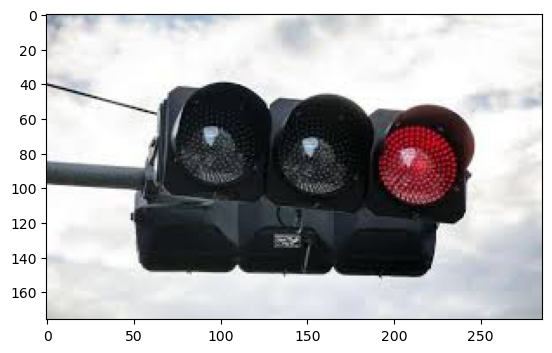

(176, 286)
<class 'numpy.ndarray'>


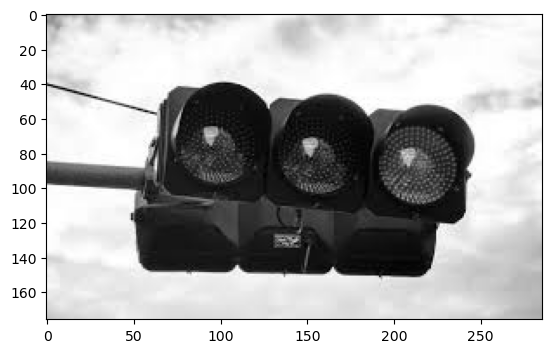

True

In [32]:
# read image from resource/
img = cv2.imread("resource/r1.jpg")

# information of this image
print(img.shape)
print(type(img))

# Show image in python notebook
# cv2_imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# Color space transformation
img_o = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#img_o = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
print(img_o.shape)
print(type(img_o))

# cv2_imshow(img_o)
plt.imshow(cv2.cvtColor(img_o, cv2.COLOR_BGR2RGB))
plt.show()

# image writing
cv2.imwrite("output/gray.jpg", img_o)

A. Gamma Mapping

In [33]:
GAMMA = 0.5

In [34]:
def gamma_correction(img, gamma):
    img_float = img.astype(np.float32)
    img_float = img_float / 255.0
    corrected_img = np.power(img_float, gamma)
    corrected_img = corrected_img * 255.0
    corrected_img = corrected_img.astype(np.uint8)
    return corrected_img

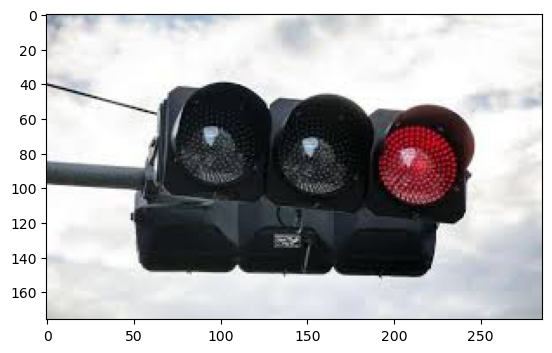

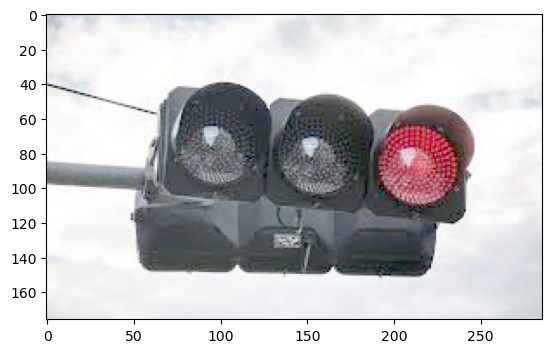

True

In [35]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

gamma_img = gamma_correction(img, GAMMA)
## show picture
plt.imshow(cv2.cvtColor(gamma_img, cv2.COLOR_BGR2RGB))
plt.show()

# image writing
image_path = "output/part1/gamma_" + str(GAMMA) + ".jpg"
folder_path = os.path.dirname(image_path)
os.makedirs(folder_path, exist_ok=True)
cv2.imwrite(image_path, gamma_img)

B. Histogram Equalization

In [36]:
def histogram_equalization(img):
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # calculate histogram v channel
    img_ori_hist = cv2.calcHist([img_hsv], [2], None, [256], [0, 256])
    
    # equlize histogram v channel (luminance)
    img_hsv[:, :, 2] = cv2.equalizeHist(img_hsv[:, :, 2])
    img_equalized = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)
    
    # calculate histogram v channel
    img_new_hist = cv2.calcHist([img_hsv], [2], None, [256], [0, 256])
    
    return img_ori_hist, img_equalized, img_new_hist

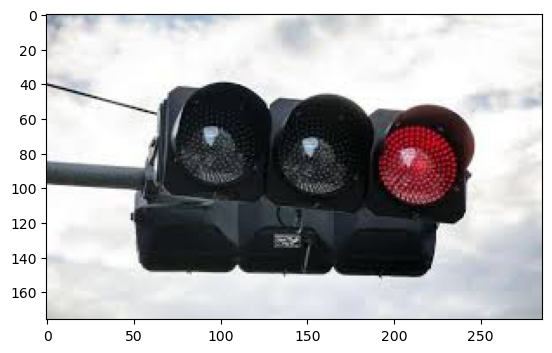

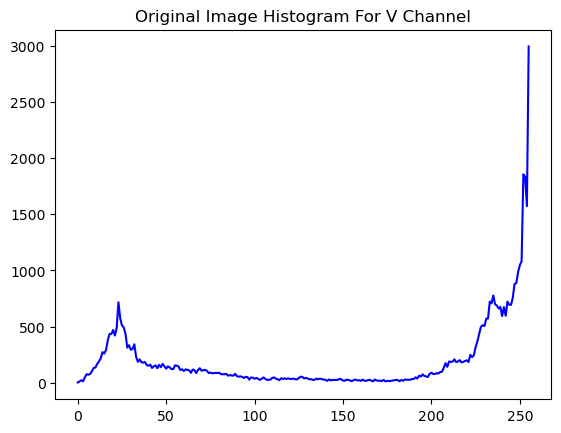

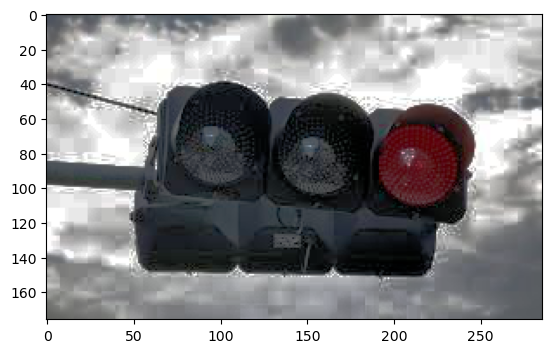

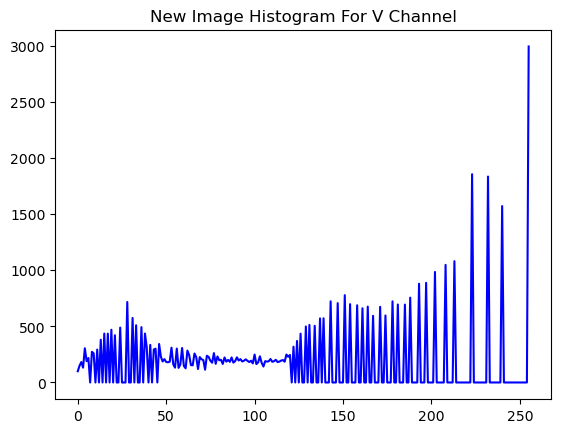

True

In [37]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

he_ori_hist, he_img, he_new_hist = histogram_equalization(img)

# plot the above computed histogram
plt.plot(he_ori_hist, color='b')
plt.title('Original Image Histogram For V Channel')
plt.savefig('output/part1/ori_hist.png')
plt.show()

## show picture
plt.imshow(cv2.cvtColor(he_img, cv2.COLOR_BGR2RGB))
plt.show()

# plot the above computed histogram
plt.plot(he_new_hist, color='b')
plt.title('New Image Histogram For V Channel')
plt.savefig('output/part1/new_hist.png')
plt.show()

# image writing
image_path = "output/part1/histo_equal.jpg"
folder_path = os.path.dirname(image_path)
os.makedirs(folder_path, exist_ok=True)
cv2.imwrite(image_path, he_img)